In [2]:
import pandas as pd
import numpy as np

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,MaxPooling2D,Flatten,Conv2D

In [4]:
train_ds= keras.utils.image_dataset_from_directory(
    directory="train",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [5]:
validation_ds= keras.utils.image_dataset_from_directory(
    directory="test",
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [6]:
#normalize
def process(image,label):
    image=tf.cast(image , tf.float32)/255.0
    return image,label

In [7]:
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [8]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
validation_ds = validation_ds.prefetch(buffer_size=AUTOTUNE)

In [9]:
#create cnn

model= Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="valid",activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(64,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Conv2D(128,kernel_size=(3,3),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))

model.add(Flatten())

model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(1,activation="sigmoid"))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [11]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])


In [12]:
history= model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10


625/625 [==============================] - 694s 1s/step - loss: 0.6473 - accuracy: 0.6202 - val_loss: 0.5566 - val_accuracy: 0.7304
Epoch 2/10
625/625 [==============================] - 808s 1s/step - loss: 0.4945 - accuracy: 0.7604 - val_loss: 0.4635 - val_accuracy: 0.7892
Epoch 3/10
625/625 [==============================] - 872s 1s/step - loss: 0.3783 - accuracy: 0.8267 - val_loss: 0.4542 - val_accuracy: 0.7926
Epoch 4/10
625/625 [==============================] - 836s 1s/step - loss: 0.2454 - accuracy: 0.8954 - val_loss: 0.6110 - val_accuracy: 0.7774
Epoch 5/10
625/625 [==============================] - 771s 1s/step - loss: 0.1260 - accuracy: 0.9517 - val_loss: 0.7841 - val_accuracy: 0.7808
Epoch 6/10
625/625 [==============================] - 794s 1s/step - loss: 0.0834 - accuracy: 0.9701 - val_loss: 1.0095 - val_accuracy: 0.7732
Epoch 7/10
625/625 [==============================] - 741s 1s/step - loss: 0.0567 - accuracy: 0.9797 - val_loss: 1.0859 - val_accuracy: 0.77

In [19]:
import cv2
import matplotlib.pyplot as plt

In [47]:
test_img=cv2.imread("dog_img.jpg")

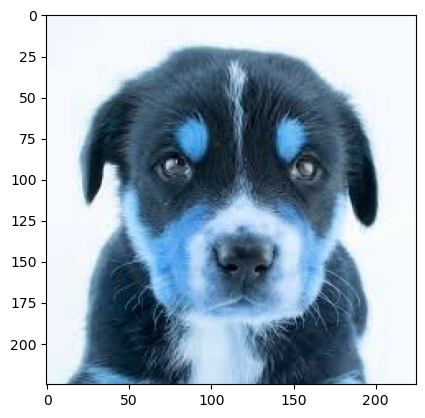

In [48]:
plt.imshow(test_img)

In [49]:
test_img=cv2.resize(test_img,(256,256))

In [50]:
test_input=test_img.reshape((1,256,256,3))

In [51]:
if model.predict(test_input)[0][0]==0:
    print("Its a CAT")
else:
    print("Its a DOG")

1/1 [==============================] - 0s 72ms/step
Its a DOG
